# Examples for Day 3

In [1]:
# initialization
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
# %load ml32.py
# MLP Classification
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.neural_network import MLPClassifier
df = read_csv('data/cdc_diabetes_small.csv')
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
mlp = MLPClassifier(random_state=42).fit(X_train, y_train)
print(f'Accuracy: {mlp.score(X_test, y_test):.2%}')


Accuracy: 72.91%


In [6]:
# %load ml33.py
# Hyperparameter tuning with grid search
from pandas import read_csv
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split as split, KFold
df = read_csv('data/cdc_diabetes_small.csv')
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = split(X, y, random_state=42)
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train, y_train)
print(f'Accuracy without tuning: {model1.score(X_test, y_test):.2%}')
kf = KFold(n_splits=5, shuffle=True, random_state=42)
params = dict(criterion=['gini', 'entropy'], max_leaf_nodes=range(2, 21))
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=kf, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)
print(grid.best_params_)
model2 = DecisionTreeClassifier(**grid.best_params_, random_state=42).fit(X_train, y_train)
print(f'Accuracy with tuning: {model2.score(X_test, y_test):.2%}')


Accuracy without tuning: 64.25%
Fitting 5 folds for each of 38 candidates, totalling 190 fits
{'criterion': 'gini', 'max_leaf_nodes': 18}
Accuracy with tuning: 71.27%


In [8]:
# %load ml34.py
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
df = read_csv('data/cdc_diabetes_small.csv')
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
pipe = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression())])
pipe.fit(X_train, y_train)
print(f'Accuracy: {pipe.score(X_test, y_test):.2%}')

Accuracy: 73.53%


In [10]:
# %load ml35.py
# Use GridSearchCV with pipeline
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline

df = read_csv('data/cdc_diabetes_small.csv')
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)

pipe2 = Pipeline([('scaler', None), ('clf', KNeighborsClassifier())])
params = {}
params['scaler'] = [None, MinMaxScaler(), StandardScaler(), RobustScaler()]
params['clf'] = [KNeighborsClassifier(), LogisticRegression(), SVC()]

kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(pipe2, params, cv=kf, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)
print(grid.best_params_)

best_pipe = grid.best_estimator_
best_pipe.fit(X_train, y_train)
print(f'Accuracy: {best_pipe.score(X_test, y_test):.2%}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'clf': LogisticRegression(), 'scaler': RobustScaler()}
Accuracy: 73.64%


In [11]:
# Extra example for grid search and pipeline
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline

df = read_csv('data/steel_faults.csv')
df.head(5)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Fault
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


In [12]:
df.isna().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Fault                    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [14]:
X = df.drop(columns=['Fault'])
y = df['Fault']

X_train, X_test, y_train, y_test = split(X, y, test_size=0.2, random_state=42)
knn1 = KNeighborsClassifier().fit(X_train, y_train)
print(f'knn1 accuracy: {knn1.score(X_test, y_test):.3%}')

knn1 accuracy: 45.501%


In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV, StratifiedKFold
mypipe = Pipeline([('scl', None), ('fs', SelectKBest()), ('clf', KNeighborsClassifier())])

param = {}
param['scl'] = [None, MinMaxScaler(), StandardScaler(), RobustScaler()]
param['fs__k'] = range(1, 28)
param['clf__n_neighbors'] = range(3, 10, 2)
param['clf__weights'] = ['uniform', 'distance']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gs = GridSearchCV(mypipe, param, cv=skf, n_jobs=-1)
gs.fit(X_train, y_train)
print(gs.best_params_)

{'clf__n_neighbors': 9, 'clf__weights': 'distance', 'fs__k': 26, 'scl': RobustScaler()}


In [31]:
knn2 = mypipe.set_params(**gs.best_params_).fit(X_train, y_train)
print(f'knn2 accuracy: {mypipe.score(X_test, y_test):.3%}')

knn2 accuracy: 70.437%


[]

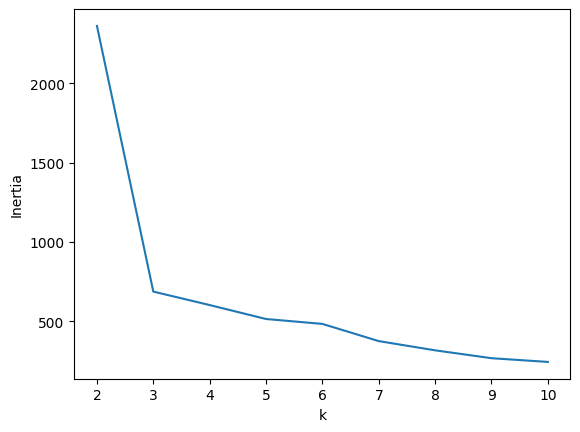

In [33]:
# %load ml36.py
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(centers=3, cluster_std=2, random_state=42)
inertia = []
for k in range(2, 11):
    km = KMeans(n_clusters=k).fit(X)
    inertia.append(km.inertia_)

plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.plot()


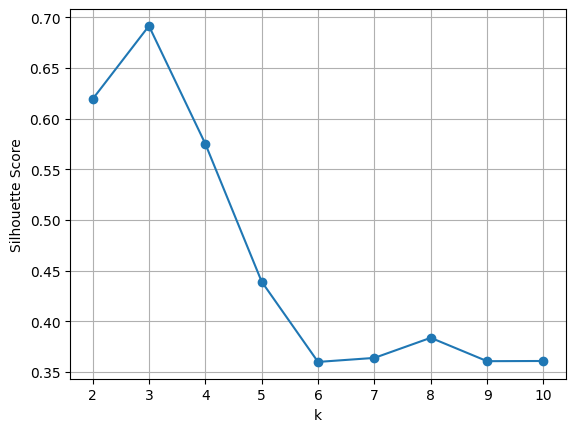

In [34]:
from sklearn.metrics import silhouette_score

sscores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=10).fit(X)
    sscores.append(silhouette_score(X, km.labels_))

plt.plot(range(2, 11), sscores, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

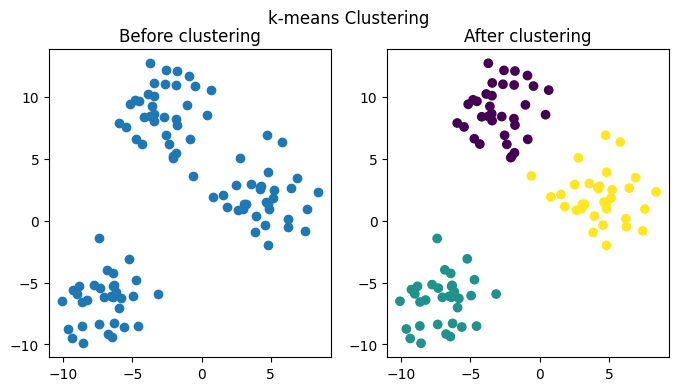

In [36]:
# %load ml37.py
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(centers=3, cluster_std=2, random_state=42)
km = KMeans(n_clusters=3, n_init=10).fit(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('k-means Clustering')
ax1.scatter(X[:, 0], X[:, 1])
ax1.set_title('Before clustering')
ax2.scatter(X[:, 0], X[:, 1], c=km.labels_)
ax2.set_title('After clustering')
plt.show()


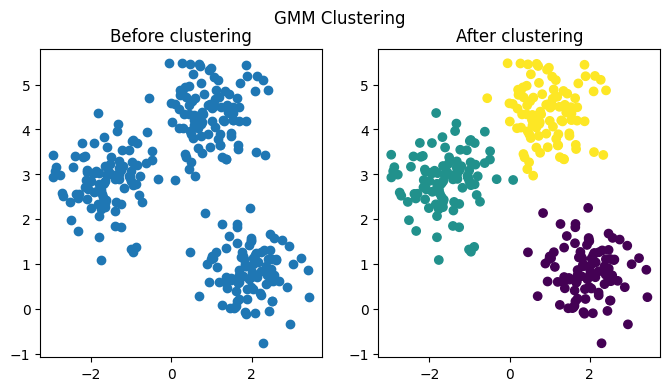

In [38]:
# %load ml38.py
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
# Fit a Gaussian Mixture Model and predict the cluster for each data point
labels = GaussianMixture(n_components=3).fit_predict(X)
# Plot the data points and cluster assignments
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('GMM Clustering')
ax1.scatter(X[:, 0], X[:, 1])
ax1.set_title('Before clustering')
ax2.scatter(X[:, 0], X[:, 1], c=labels)
ax2.set_title('After clustering')
plt.show()


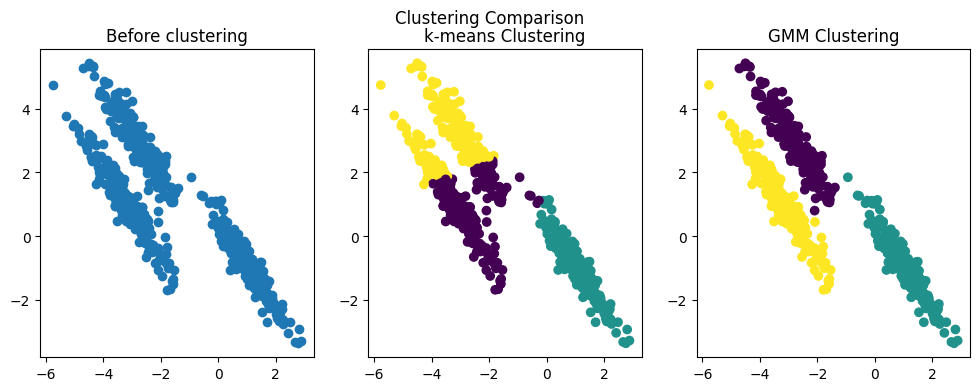

In [41]:
# %load ml39.py
# Clustering of non-spherical data points
from pandas import read_csv
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

X = read_csv("data/long_clusters.csv").values
km = KMeans(n_clusters=3, n_init=10).fit(X)
labels = GaussianMixture(n_components=3).fit_predict(X)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Clustering Comparison')
ax1.scatter(X[:, 0], X[:, 1])
ax1.set_title('Before clustering')
ax2.scatter(X[:, 0], X[:, 1], c=km.labels_)
ax2.set_title('k-means Clustering')
ax3.scatter(X[:, 0], X[:, 1], c=labels)
ax3.set_title('GMM Clustering')
plt.show()

In [43]:
# %load ml40.py
# Dimensionality reduction using PCA
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

pca = PCA(n_components=24)
X_reduced = pca.fit_transform(X)

print(X.shape, X_reduced.shape)
print(pca.explained_variance_ratio_.sum())


(1797, 64) (1797, 24)
0.9260737010079612
